In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_science_job.csv')

In [3]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
data.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

From above table we can clearly see that we can remove the columns who missing values percentage is less than 5 percent

In [7]:
cols = [var for var in data.columns if data[var].isnull().mean() < 0.05 and data[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
len(data[cols].dropna()) / len(data)  * 100 

89.68577095730244

Above column is telling if we delete all missing values then it we will left with 89 percent of data


In [11]:
new_data = data[cols].dropna()

Now we will see is there any change in distribution after removing null values if yes then we will remove it

<Axes: >

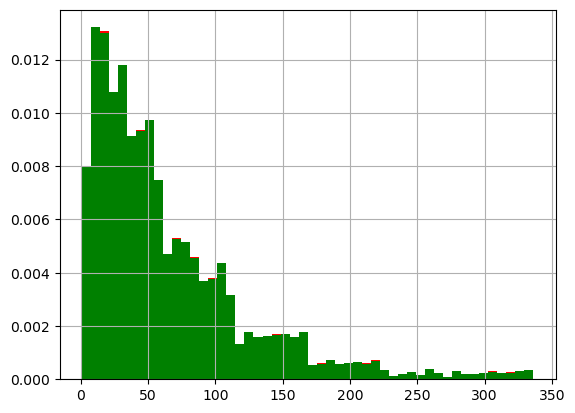

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['training_hours'].hist(bins=50,ax=ax,density=True,color='red')
new_data['training_hours'].hist(bins=50,ax=ax,density=True,color='green')

<Axes: >

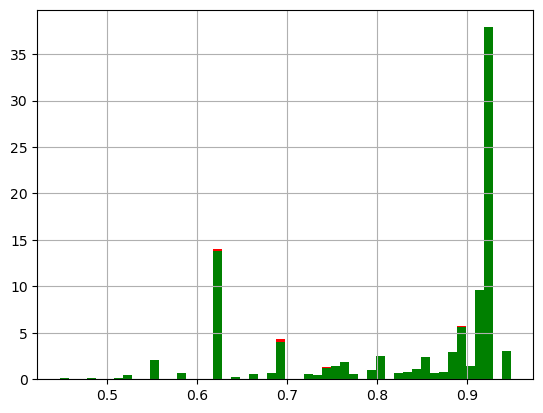

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

data['city_development_index'].hist(bins=50,ax=ax,density=True,color='red')
new_data['city_development_index'].hist(bins=50,ax=ax,density=True,color='green')

In [17]:
# we will see for next columns also whose missing values are removed

In [18]:
temp = pd.concat([data['enrolled_university'].value_counts() / len(data), new_data['enrolled_university'].value_counts() / len(new_data)],axis=1)
temp.columns = ['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
So in above comparision we are checking that before doing cca the categories contribution in the dataset and after doing cca their contibution must not change a lot if its less changed then its ok 